In [1]:
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import numpy as np
import os 

data = pd.read_csv('train.csv')
# データ概観
data.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1
5,6,29,blue-collar,single,secondary,no,260,yes,no,unknown,2,jun,707,14,-1,0,unknown,1
6,7,37,services,married,secondary,no,52,yes,no,cellular,6,sep,908,1,185,9,success,1
7,8,32,technician,single,secondary,no,230,yes,no,cellular,18,may,442,1,266,8,failure,1
8,9,31,admin.,single,secondary,no,0,yes,no,cellular,7,may,895,2,295,2,failure,1
9,10,32,self-employed,single,tertiary,no,1815,no,no,telephone,10,aug,235,1,102,2,failure,1


In [2]:
# 各種統計量の表示。
data.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000
mean,13564.500000,40.951010,1355.800870,15.806215,260.711295,2.751769,40.528052,0.579733,0.117001
std,7831.323388,10.608542,3003.305272,8.337904,260.091727,3.126594,100.382462,2.503653,0.321427
min,1.000000,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6782.750000,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,13564.500000,39.000000,449.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,20346.250000,48.000000,1428.000000,21.000000,323.000000,3.000000,-1.000000,0.000000,0.000000
max,27128.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [3]:
# 変数の型の表示。
data.dtypes

id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

<AxesSubplot:ylabel='Frequency'>

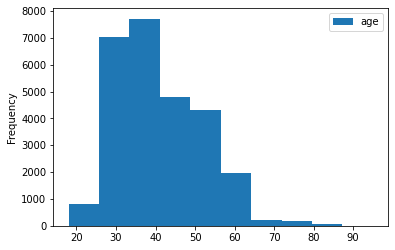

In [4]:
# ageのヒストグラムの表示。
data.plot.hist(y='age')

In [5]:
# jobの集計。
data['job'].value_counts()

blue-collar      5886
management       5620
technician       4491
admin.           3085
services         2506
retired          1391
self-employed     945
entrepreneur      914
unemployed        790
housemaid         765
student           557
unknown           178
Name: job, dtype: int64

In [6]:
#jobとyのクロス集計。
pd.crosstab(data['job'], data['y'])

y,0,1
job,,
admin.,2700,385
blue-collar,5456,430
entrepreneur,834,80
housemaid,697,68
management,4853,767
retired,1080,311
self-employed,828,117
services,2282,224
student,391,166


In [7]:
# 年齢別のカラムの作成。
data['age_c'] = pd.cut(data['age'], bins=[0, 20, 30, 40, 50, 60, 100])
print(data['age_c'])

0         (30, 40]
1         (50, 60]
2         (30, 40]
3        (60, 100]
4         (30, 40]
           ...    
27123     (40, 50]
27124     (30, 40]
27125     (30, 40]
27126     (30, 40]
27127     (20, 30]
Name: age_c, Length: 27128, dtype: category
Categories (6, interval[int64]): [(0, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 100]]


In [8]:
# age_cとyのクロス集計。
pd.crosstab(data['age_c'], data['y'])

y,0,1
age_c,,
"(0, 20]",39,21
"(20, 30]",3486,655
"(30, 40]",9488,1111
"(40, 50]",6117,602
"(50, 60]",4416,488
"(60, 100]",408,297


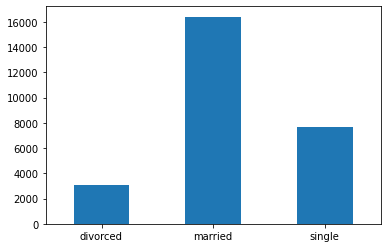

In [9]:
# プロットデータを設定してプロットを実行。
y = data['marital'].value_counts().reindex(['divorced', 'married', 'single']).plot.bar(rot=0)